In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [5]:
df = pd.read_csv('wb_data.csv')

In [6]:
df.head()

,Country,BCA,BCA_NGDPD,GGR_NGDP,GGXCNL_NGDP,GGXONLB_NGDP,GGXWDG_NGDP,GGX_NGDP,LE,LP,...,NGDPRPC,NGDPRPPPPC,NGDP_D,NGDP_FY,NGDP_RPCH,PCPI,PCPIPCH,PPPGDP,PPPPC,PPPSH
0,Afghanistan,2.247,11.157,25.694,-2.243,-2.206,7.397,27.937,0.000,32.941,...,39127.08,2328.76,120.050,1547.290,-2.351,120.671,5.607,80.912,2456.29,0.061
1,Albania,-1.315,-8.677,25.905,-6.713,-4.621,75.927,32.619,0.000,2.878,...,280984.50,13394.46,203.320,1644.080,-3.482,108.613,1.621,40.658,14128.00,0.031
2,Algeria,-18.711,-12.911,30.684,-11.959,-11.655,52.273,42.643,0.000,43.851,...,163208.89,10746.03,256.869,18383.800,-5.100,211.180,2.415,497.030,11334.53,0.374
3,Andorra,0.422,14.634,40.485,-2.960,0.000,46.329,43.445,0.045,0.078,...,30447.35,49728.24,106.557,2.531,-11.184,102.298,0.257,4.092,52451.57,0.003
4,Angola,0.872,1.500,20.983,-1.898,4.944,136.540,22.882,0.000,31.031,...,47219.95,6482.35,2293.820,33611.360,-5.750,431.227,22.277,212.172,6837.35,0.160


##### Data Split 1: all of our final dataset, no scaling

In [7]:
# NGDPDPC - gdp_per_capita
y = df['NGDPDPC']
X = df.drop(['NGDPDPC','Country'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

##### Data Split 2: all of our final dataset, with scaling

In [8]:
sc_X = StandardScaler()

X2_train = sc_X.fit_transform(X_train)
X2_test = sc_X.fit_transform(X_test)
y2_train = y_train
y2_test = y_test


##### Data Split 3: feature selected dataset, no scaling

In [9]:
y3 = y
X3 = df.drop(['NGDPDPC',
 'BCA',
 'Country',
 'GGR_NGDP',
 'GGXCNL_NGDP',
 'GGXONLB_NGDP',
 'GGXWDG_NGDP',
 'GGX_NGDP',
 'LP',
 'NGDP',
 'NGDPD',
 'NGDPPC',
 'NGDPRPC',
 'PPPPC'], axis=1)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=101)

##### Data Split 4: feature selected dataset, with scaling

In [10]:
sc_X4 = StandardScaler()

X4_train = sc_X4.fit_transform(X3_train)
X4_test = sc_X4.fit_transform(X3_test)
y4_train = y3_train
y4_test = y3_test

## SVM

##### Model Training


In [11]:
svm1 = SVR()
svm1.fit(X_train,y_train)

svm2 = SVR()
svm2.fit(X2_train,y2_train)

svm3 = SVR()
svm3.fit(X3_train,y3_train)

svm4 = SVR()
svm4.fit(X4_train,y4_train)

SVR()

In [12]:
svm1_pred = svm1.predict(X_test)
svm2_pred = svm2.predict(X2_test)
svm3_pred = svm3.predict(X3_test)
svm4_pred = svm4.predict(X4_test)

In [13]:
print('SVM Performance:')

print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, svm1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svm1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, svm1_pred))

print('\nall features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y2_test, svm2_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, svm2_pred)))
print('R2_Score: ', metrics.r2_score(y2_test, svm2_pred))

print('\nselected features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y3_test, svm3_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y3_test, svm3_pred)))
print('R2_Score: ', metrics.r2_score(y3_test, svm3_pred))

print('\nselected features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y4_test, svm4_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y4_test, svm4_pred)))
print('R2_Score: ', metrics.r2_score(y4_test, svm4_pred))

SVM Performance:

all features, No scaling:
MAE: 9027.631205128335
RMSE: 14591.579765997723
R2_Score:  -0.14949262540213004

all features, with scaling:
MAE: 9020.534860148047
RMSE: 14583.955904357928
R2_Score:  -0.148291757029978

selected features, No scaling:
MAE: 9027.631205128228
RMSE: 14591.57976599785
R2_Score:  -0.14949262540215047

selected features, with scaling:
MAE: 9019.726370562204
RMSE: 14583.275082145705
R2_Score:  -0.14818454821894433


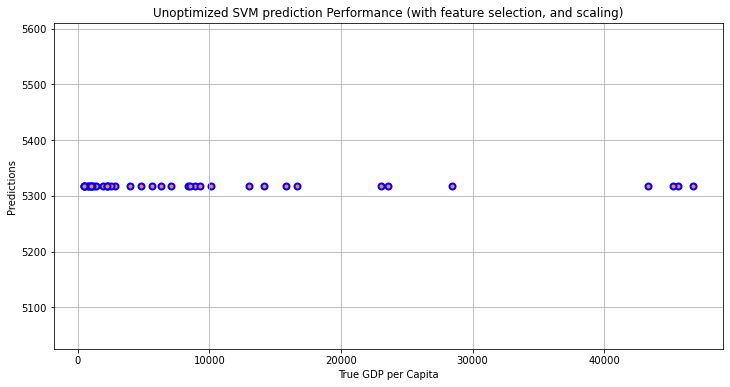

In [14]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(y3_test,svm3_pred, linewidths=2, edgecolors='b', color='coral')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Unoptimized SVM prediction Performance (with feature selection, and scaling)') 
plt.grid()
plt.show()

Feature scaling, and feature selection, made almost no difference in the prediction performance of the SVM algorithm. 

The results of SVM is worse than that of Linear Regression, so we will try to improve SVM's performance by optimizing its parameters using grid search.

##### Optimizing SVM

In [15]:
param_grid = {'C': [1, 10, 100], 'gamma': [0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVR(),param_grid,refit=True,verbose=3)

In [16]:
grid.fit(X4_train,y4_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ......C=1, gamma=0.01, kernel=rbf;, score=-0.250 total time=   0.0s
[CV 2/5] END ......C=1, gamma=0.01, kernel=rbf;, score=-0.254 total time=   0.0s
[CV 3/5] END ......C=1, gamma=0.01, kernel=rbf;, score=-0.107 total time=   0.0s
[CV 4/5] END ......C=1, gamma=0.01, kernel=rbf;, score=-0.331 total time=   0.0s
[CV 5/5] END ......C=1, gamma=0.01, kernel=rbf;, score=-0.263 total time=   0.0s
[CV 1/5] END .....C=1, gamma=0.001, kernel=rbf;, score=-0.250 total time=   0.0s
[CV 2/5] END .....C=1, gamma=0.001, kernel=rbf;, score=-0.254 total time=   0.0s
[CV 3/5] END .....C=1, gamma=0.001, kernel=rbf;, score=-0.107 total time=   0.0s
[CV 4/5] END .....C=1, gamma=0.001, kernel=rbf;, score=-0.331 total time=   0.0s
[CV 5/5] END .....C=1, gamma=0.001, kernel=rbf;, score=-0.263 total time=   0.0s
[CV 1/5] END ....C=1, gamma=0.0001, kernel=rbf;, score=-0.250 total time=   0.0s
[CV 2/5] END ....C=1, gamma=0.0001, kernel=rbf;, 

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1, 10, 100], 'gamma': [0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [17]:
grid.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [18]:
grid.best_estimator_

SVR(C=100, gamma=0.01)

In [19]:
grid_predictions = grid.predict(X4_test)

In [20]:
print('MAE:', metrics.mean_absolute_error(y4_test, grid_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y4_test, grid_predictions)))
print('R2_Score: ', metrics.r2_score(y4_test, grid_predictions))

MAE: 8843.882365635618
RMSE: 14352.632054422887
R2_Score:  -0.1121533259493741


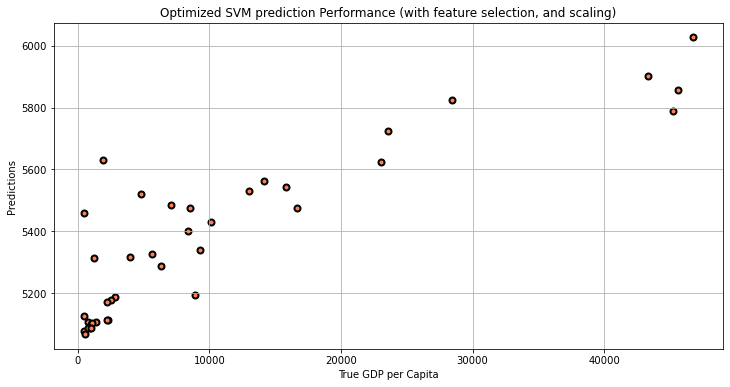

In [21]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(y4_test,grid_predictions,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Optimized SVM prediction Performance (with feature selection, and scaling)') 
plt.grid()
plt.show()

SVM has improved a little with grid search, but it still performs below linear regression.